<a href="https://colab.research.google.com/github/m-aliabbas/EvolutionaryComputing/blob/master/MinistChallange.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install kaggle

In [0]:
!mkdir .kaggle

In [0]:
!mkdir -p ~/.kaggle

In [12]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"maliabbas","key":"6247c50f8ddaf5b1e6fa4a268543d6d4"}'}

In [0]:
!cp  kaggle.json ~/.kaggle/

In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [15]:
!kaggle competitions download -c digit-recognizer

 89% 65.0M/73.2M [00:00<00:00, 72.6MB/s]
100% 73.2M/73.2M [00:00<00:00, 115MB/s] 
 84% 41.0M/48.8M [00:01<00:00, 23.9MB/s]
100% 48.8M/48.8M [00:01<00:00, 42.0MB/s]
  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 78.0MB/s]


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Lambda, Flatten
from keras.optimizers import Adam, RMSprop
from sklearn.model_selection import train_test_split

In [0]:
import pandas as pd

In [0]:
train = pd.read_csv("train.csv")

In [0]:
test_images = (pd.read_csv("test.csv").values).astype('float32')

In [0]:
train_images = (train.iloc[:, 1:].values).astype('float32')

In [0]:
train_labels = train['label'].values.astype('int32')

In [29]:
train_labels

array([1, 0, 1, ..., 7, 6, 9], dtype=int32)

In [31]:
train_images.shape

(42000, 784)

In [0]:
train_images = train_images.reshape(train_images.shape[0], 28, 28)

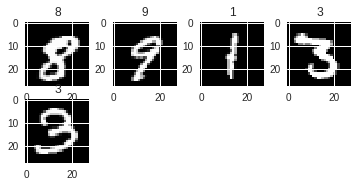

In [46]:
for i in range(10,15):
    plt.subplot(330+(i+1))
    plt.imshow(train_images[i], cmap=plt.get_cmap('gray'))
    plt.title(train_labels[i])

In [0]:
train_images = train_images.reshape((42000, 28 * 28))

In [0]:
train_images = train_images/255
test_images = test_images/255

In [49]:
train_images.shape

(42000, 784)

In [54]:
def df_reshape(df):
    print("Previous shape, pixels are in 1D vector:", df.shape)
    df = df.reshape(-1, 28, 28, 1) 
    # -1 means the dimension doesn't change, so 42000 in the case of xtrain and 28000 in the case of test
    print("After reshape, pixels are a 28x28x1 3D matrix:", df.shape)
    return df

xtrain = df_reshape(train_images) # numpy.ndarray type

Previous shape, pixels are in 1D vector: (42000, 784)
After reshape, pixels are a 28x28x1 3D matrix: (42000, 28, 28, 1)


In [55]:
xtest=df_reshape(test_images)

Previous shape, pixels are in 1D vector: (28000, 784)
After reshape, pixels are a 28x28x1 3D matrix: (28000, 28, 28, 1)


In [58]:
from keras.utils.np_utils import to_categorical

print(type(train_labels))
# number of classes, in this case 10
nclasses = train_labels.max() - train_labels.min() + 1

print("Shape of ytrain before: ", train_labels.shape) # (42000,)

ytrain = to_categorical(train_labels, 10)

print("Shape of ytrain after: ", train_labels.shape) # (42000, 10), also numpy.ndarray type
print(type(train_labels))

<class 'numpy.ndarray'>
Shape of ytrain before:  (42000,)
Shape of ytrain after:  (42000,)
<class 'numpy.ndarray'>


In [61]:
from sklearn.model_selection import train_test_split
import numpy as np
# fix random seed for reproducibility
seed = 2
np.random.seed(seed)

# percentage of xtrain which will be xval
split_pct = 0.1

# Split the train and the validation set
xtrain, xval, ytrain, yval = train_test_split(xtrain,
                                              ytrain, 
                                              test_size=split_pct,
                                              random_state=seed,
                                              shuffle=True,
                                              stratify=ytrain
                                             )

print(xtrain.shape, ytrain.shape, xval.shape, yval.shape)

(37800, 28, 28, 1) (37800, 10) (4200, 28, 28, 1) (4200, 10)


In [0]:
from keras import backend as K

# for the architecture
from keras.models import Sequential
from keras.layers import Dense, Dropout, Lambda, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPool2D, AvgPool2D

# optimizer, data generator and learning rate reductor
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [63]:
model = Sequential()

dim = 28
nclasses = 10

model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(dim,dim,1)))
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu',))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(nclasses, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [64]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        102464    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
__________

In [0]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [0]:
lr_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                 patience=3, 
                                 verbose=1, 
                                 factor=0.5, 
                                 min_lr=0.00001)

In [0]:
datagen = ImageDataGenerator(
          featurewise_center=False,            # set input mean to 0 over the dataset
          samplewise_center=False,             # set each sample mean to 0
          featurewise_std_normalization=False, # divide inputs by std of the dataset
          samplewise_std_normalization=False,  # divide each input by its std
          zca_whitening=False,                 # apply ZCA whitening
          rotation_range=30,                   # randomly rotate images in the range (degrees, 0 to 180)
          zoom_range = 0.1,                    # Randomly zoom image 
          width_shift_range=0.1,               # randomly shift images horizontally (fraction of total width)
          height_shift_range=0.1,              # randomly shift images vertically (fraction of total height)
          horizontal_flip=False,               # randomly flip images
          vertical_flip=False)                 # randomly flip images


In [0]:
datagen.fit(xtrain)

In [0]:
epochs = 15
batch_size = 64

In [70]:
history = model.fit_generator(datagen.flow(xtrain,ytrain, batch_size=batch_size),
                              epochs=epochs, 
                              validation_data=(xval,yval),
                              verbose=1, 
                              steps_per_epoch=xtrain.shape[0] // batch_size, 
                              callbacks=[lr_reduction])

Instructions for updating:
Use tf.cast instead.
Epoch 1/15
590/590 [==============================] - 23s 38ms/step - loss: 0.3593 - acc: 0.8836 - val_loss: 0.0739 - val_acc: 0.9750
Epoch 2/15
590/590 [==============================] - 17s 29ms/step - loss: 0.1133 - acc: 0.9657 - val_loss: 0.0347 - val_acc: 0.9886
Epoch 3/15
590/590 [==============================] - 17s 29ms/step - loss: 0.0816 - acc: 0.9750 - val_loss: 0.0380 - val_acc: 0.9867
Epoch 4/15
590/590 [==============================] - 17s 29ms/step - loss: 0.0686 - acc: 0.9789 - val_loss: 0.0322 - val_acc: 0.9888
Epoch 5/15
590/590 [==============================] - 17s 29ms/step - loss: 0.0638 - acc: 0.9797 - val_loss: 0.0404 - val_acc: 0.9886
Epoch 6/15
590/590 [==============================] - 17s 29ms/step - loss: 0.0575 - acc: 0.9825 - val_loss: 0.0269 - val_acc: 0.9912
Epoch 7/15
590/590 [==============================] - 17s 29ms/step - loss: 0.0552 - acc: 0.9838 - val_loss: 0.0226 - val_acc: 0.9926
Epoch 8/15
590

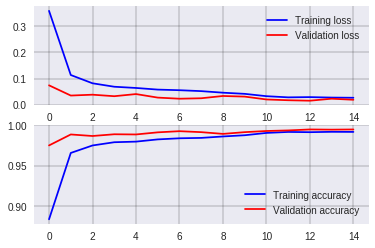

In [71]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss",axes =ax[0])
ax[0].grid(color='black', linestyle='-', linewidth=0.25)
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
ax[1].grid(color='black', linestyle='-', linewidth=0.25)
legend = ax[1].legend(loc='best', shadow=True)

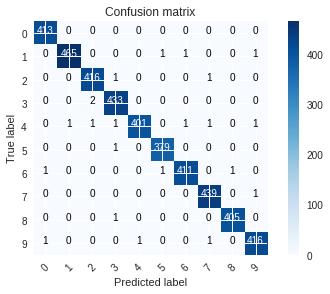

In [73]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
ypred_onehot = model.predict(xval)
# Convert predictions classes from one hot vectors to labels: [0 0 1 0 0 ...] --> 2
ypred = np.argmax(ypred_onehot,axis=1)
# Convert validation observations from one hot vectors to labels
ytrue = np.argmax(yval,axis=1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(ytrue, ypred)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes=range(nclasses))

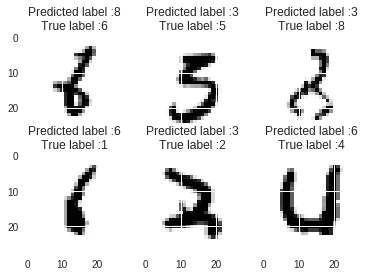

In [74]:
errors = (ypred - ytrue != 0) # array of bools with true when there is an error or false when the image is cor

ypred_er = ypred_onehot[errors]
ypred_classes_er = ypred[errors]
ytrue_er = ytrue[errors]
xval_er = xval[errors]

def display_errors(errors_index, img_errors, pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows, ncols, sharex=True, sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1
            
# Probabilities of the wrong predicted numbers
ypred_er_prob = np.max(ypred_er,axis=1)

# Predicted probabilities of the true values in the error set
true_prob_er = np.diagonal(np.take(ypred_er, ytrue_er, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_er = ypred_er_prob - true_prob_er

# Sorted list of the delta prob errors
sorted_delta_er = np.argsort(delta_pred_true_er)

# Top 6 errors. You can change the range to see other images
most_important_er = sorted_delta_er[-6:]
display_errors(most_important_er, xval_er, ypred_classes_er, ytrue_er)

In [77]:

predictions = model.predict_classes(xtest, verbose=1)


submissions = pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)),
                            "Label": predictions})

submissions.to_csv("mnist2908.csv", index=False, header=True)

28000/28000 [==============================] - 4s 129us/step


In [81]:
!kaggle competitions submit -c digit-recognizer -f mnist2908.csv -m "My First Results using CNNS"

100% 208k/208k [00:04<00:00, 50.4kB/s]
Successfully submitted to Digit Recognizer